<div style="text-align: right"><strong>Capstone #2:</strong> <span style="color:darkred">Unit 1 Narrative Analytics and Experimentation </span> </div>

 ---------

# <span style="color:darkblue">Heart Disease Classification</span>

__Author:__ Ryan Harper 

--------

<div style="text-align: center"> <strong>Heart Disease Classification (1-4)</strong> </div>

<img src=http://www.heartfailure.org/wp-content/uploads/2015/03/www.HF-Stages1.jpg width="600">

<div style="text-align: right">http://www.heartfailure.org/heart-failure/the-stages-of-heart-failure/index.html </div>

# <span style="color:darkblue">Overview --CHECK FOR UNIFORMITY BETWEEN LOC--</span>

__Data Source:__ http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

This data on health and heart disease was made available by UC Irvine's Machine Learning Repository (http://archive.ics.uci.edu/ml/index.php). It includes categorical variables (i.e. ~2-4 variations of a physical attribute) and continuous variables (blood pressure, cholesterol, and age). The question proposed by the research team was whether the first 13 features (from __age__ to __thal__) can predict the type of heart disease (__num__).

__Variables:__
>__age:__ _age in years_<br>
__sex:__ _sex (1 = male; 0 = female)_ <br>
__cp:__ _chest pain type (1=typical) (1-4)_<br>
__trestbps:__ resting blood pressure (in mm Hg)<br>
__chol:__ serum cholesterol (in mg/dl)<br>
__fbs:__ fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)<br>
__restecg:__ resting electrocardiographic results (0 = normal) (0-2)<br>
__thalach:__ maximum heart rate achieved<br>
__exang:__ exercise induced angina (1 = yes; 0 = no)<br>
__oldpeak:__ st depression induced by exercise relative to rest<br>
__slope:__ the slope of the peak exercise ST segment (1: upslope, 2: flat, 3: downslope)<br>
__ca:__ number of major vessels (0-3)<br>
__thal:__ 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
__num:__ diagnosis of heart disease (angiographic disease status) (0: no presence, 1-4: increasing classification of heart disease severity)<br>

__Questions:__
>__Question 1:__ Are there variations between the four sample locations?<br>
__Question 2:__ What relationships do the thirteen features have with one another?<br>
__Question 3:__ What is the gender distribution of each sample?

__Hypotheses:__ 
> __Hypothesis 1: __ __Age__, __sex__, cholesterol (__chol__), and blood pressure (__trestbps__) are strong indicators of heart disease. <br>
__Hypothesis 2: __ __Age__ is the strongest indicator of heart disease. <br> __Hypothesis 3: __Heart rate (__thalach__) is not a strong indicator of heart disease.

# <span style="color:darkblue">Results</span>

__Answers:__
> __Answer 1:__ Sample sizes vary significantly between genres (may reflect the overall industry or just a result of scraped data). There are significant differences between genres with regards to average gross profits but this might also be impacted by average budget. Animation films appear to have the best gross profit between the inner and upper quartile range. Romance, Horror, and Music genres seem to trend towards a positive gross profit albeit their upper quartile ranges are smaller than other high grossing genres. The lower quartile range of Action and Adventure genres seem to show a larger range of financial loss. <br><br>
__Answer 2:__ Based on the histogram plots, most genres appear to be left skewed. Exponential curves in QQ plots indicates most genres are left skewed. Animation appears more linear so it could have a normal distribution.<br><br>
__Answer 3:__ Action, Fantasy, Science Fiction genres have the highest correlation between budget and profit. Western, Horror, War, and History genres have low correlation between budget and profit

__Hypotheses:__ 
> __Hypothesis 1: __There is a difference between Action and Animation genre samples for gross profits. <br>
__Hypothesis 2: __Budget and genre correlate with gross. <br> __Hypothesis 3: __Animation films have the best gross profit potential depending on budget.

----------

# <span style="color:darkblue">Part 1: Cleaning Data</span>

In [172]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
from matplotlib.pyplot import subplots, show
import ast
import math
import re
from scipy.stats import ttest_ind, mannwhitneyu, median_test
import missingno as msno
from IPython.display import display
from IPython.core.debugger import Tracer

%matplotlib inline

In [173]:
# change optional settings for libraries
sns.set_style("whitegrid")
pd.set_option('show_dimensions', False)
np.warnings.filterwarnings('ignore')

In [174]:
filename = ['processed.cleveland.data','processed.hungarian.data','processed.switzerland.data','processed.va.data']
colnames=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [175]:
heartdisease = []

for path in filename:
    tempdf = pd.read_csv('../data/' + path, names=colnames)
    tempname = re.findall(r'\.([a-z]*)\.',path)[0]
    # adds location of data to the dataframe
    tempdf['location'] = tempname
    heartdisease.append(tempdf)

heartdf = pd.concat(heartdisease)

In [182]:
heartdf['location'].loc[heartdf['num'] == 0].value_counts()

heartdf['location'] = pd.Categorical(heartdf['location'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,location,code
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,0,cleveland,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,cleveland,0
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,1,cleveland,0
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,0,cleveland,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,0,cleveland,0


__Missing Data__

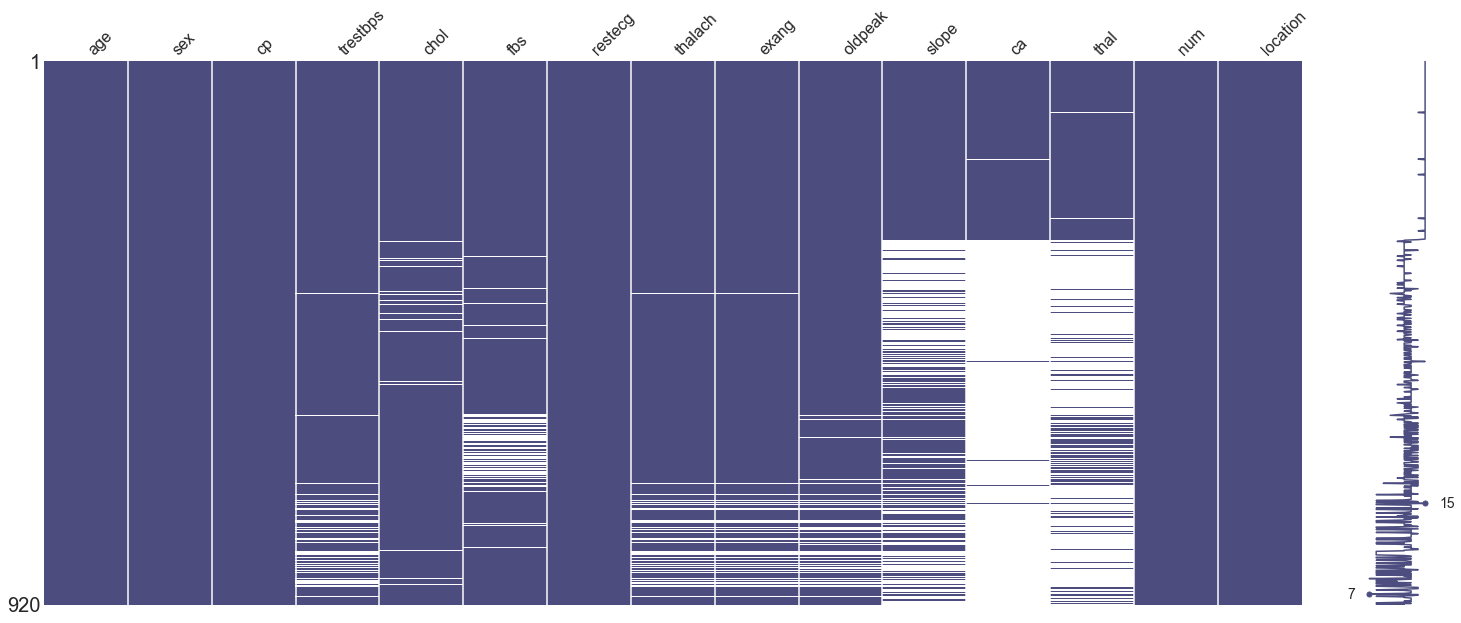

In [177]:
# check for missing data
heartdf = heartdf.replace('?',np.nan)

msno.matrix(heartdf,color=(.3, .3, .5))

_ __slope__, __ca__, and __thal__ appear to have a large number of missing values. __trestbps__, __thalach__, __exang__, and __oldpeak__ appear to have a smaller percentage of missing values for the entire row._

__Delete variables with large number of null values__

In [178]:
del heartdf['slope']
del heartdf['ca']
del heartdf['thal']

__Clean null value rows from dataframe and convert strings to floats__

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, num, location]
Index: []


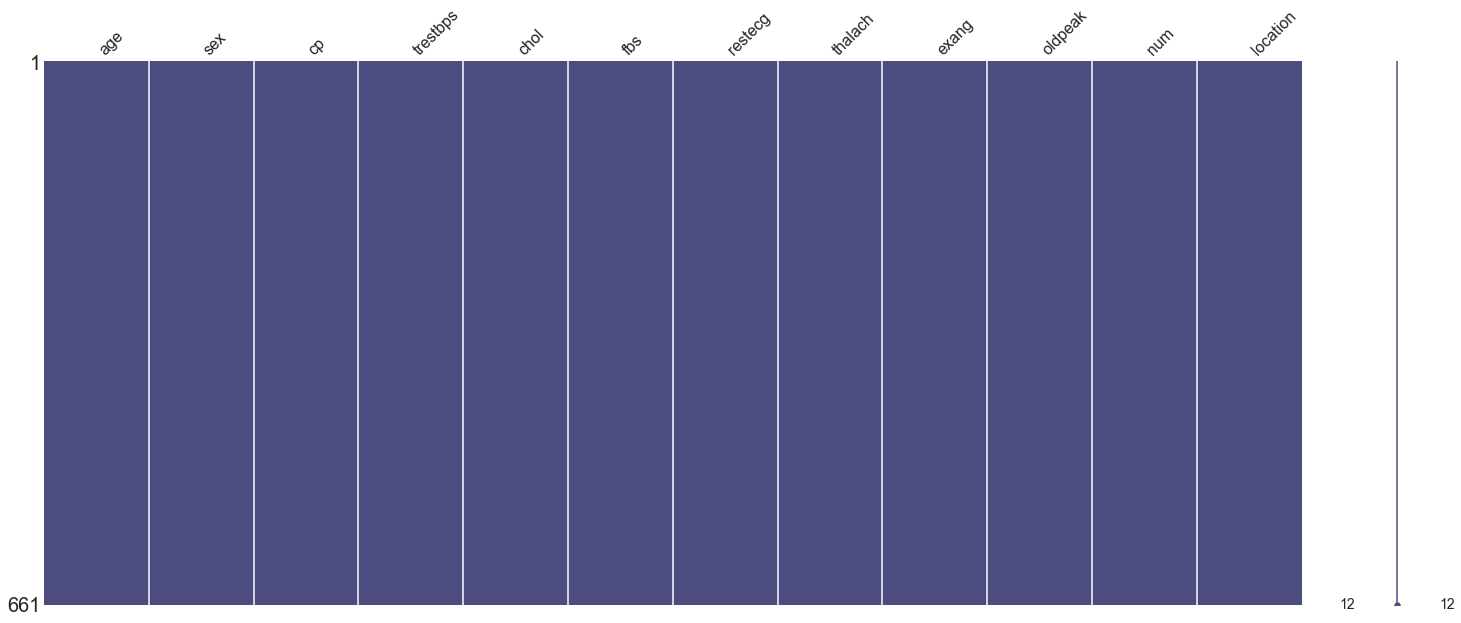

In [179]:
heart = heart.loc[heart['chol'] != 0].dropna()

for column in heart.columns:
    if column != 'location':
        heart[column] = pd.to_numeric(heart[column])
msno.matrix(heart,color=(.3, .3, .5))

print(heart.loc[heart['chol'] == 0])

_180 rows were lost from data cleaning, 3 variables were removed, and string object columns were converted to floats._

__Data Summary:__

In [180]:
# reporting of data
display(heart.head(3),heart.shape,heart.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 199
Data columns (total 12 columns):
age         661 non-null float64
sex         661 non-null float64
cp          661 non-null float64
trestbps    661 non-null float64
chol        661 non-null float64
fbs         661 non-null float64
restecg     661 non-null float64
thalach     661 non-null float64
exang       661 non-null float64
oldpeak     661 non-null float64
num         661 non-null int64
location    661 non-null object
dtypes: float64(10), int64(1), object(1)
memory usage: 67.1+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,location
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1,cleveland


(661, 12)

None

#  <span style="color:darkblue">Part 2: Exploring the data</span>

__A. Scatterplot using univariate and bivariate methods__

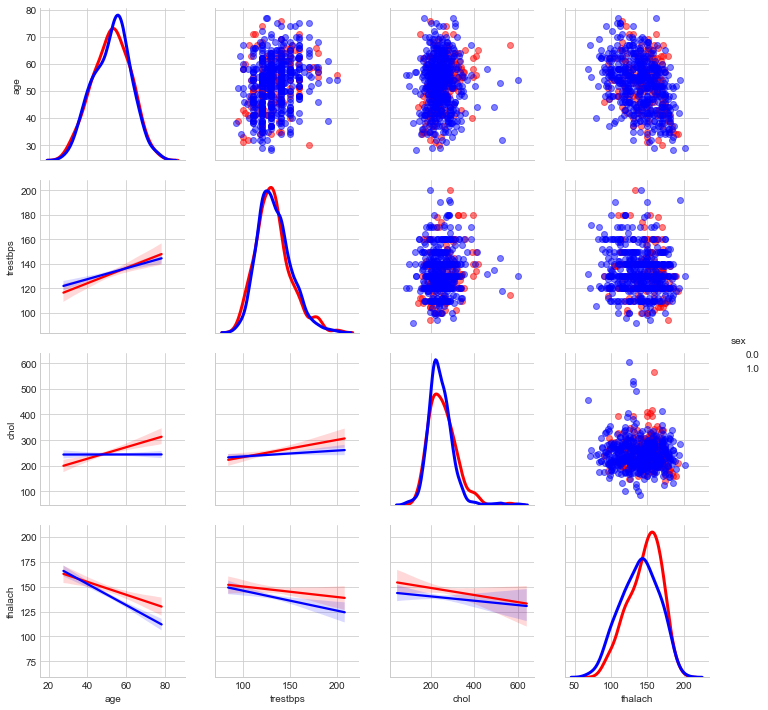

In [64]:
# Make the scatterplot matrix
collist = ['age','trestbps','chol','thalach']


g = sns.PairGrid(data=heart, diag_sharey=False, hue="sex", vars=collist, palette=['r','b'])
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)

g.add_legend()

plt.show()

_ __Answer to Q1:__ abcd._

#  <span style="color:darkblue">Part 3: Feature Engineering

In [167]:
heart.head
heart.location.unique()

array(['cleveland', 'hungarian', 'va'], dtype=object)

In [196]:
def dum_feat():
    # Making dummies.
    # Also creating a data frame to hold our features.
    features = pd.get_dummies(heart['num'])
    features['num'] = heart['num']
    features = features.drop(features.columns[0:5], axis=1)
    features['age'] = heart['age']
    features['exists'] = np.where(heart['num'] >= 1, 1, 0)
    features['gender'] = heart['sex']
    features['adult'] = np.where(heart['sex'] >= 18, 1, 0)

    features['chol'] = heart['chol']
    features['cholwarn'] = np.where(heart['chol'] >= 240, 1, 0)
    features['bp'] = heart['trestbps']
    features['bpwarn'] = np.where(heart['chol'] >= 140, 1, 0)
    loc = ['cleveland','va','hungarian']
    features['location'] = pd.Categorical(heart.location).codes
    return features

features = dum_feat()

In [198]:
features.head()

,num,age,exists,gender,adult,chol,cholwarn,bp,bpwarn,location
0,0,63.0,0,1.0,0,233.0,0,145.0,1,0
1,2,67.0,1,1.0,0,286.0,1,160.0,1,0
2,1,67.0,1,1.0,0,229.0,0,120.0,1,0
3,0,37.0,0,1.0,0,250.0,1,130.0,1,0
4,0,41.0,0,0.0,0,204.0,0,130.0,1,0


In [156]:
features.bp.min()

92.0

#  <span style="color:darkblue">Part 3: Principal Components Analysis

In [226]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

Actual Transformation

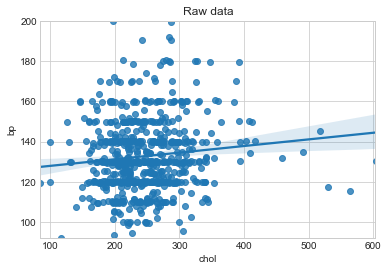

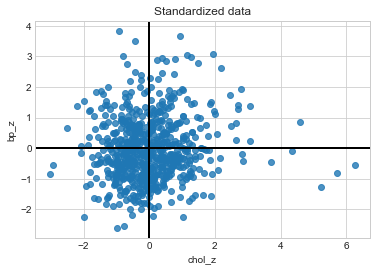

In [227]:
t = sns.regplot(
    'chol',
    'bp',
    features,
    x_jitter=.49,
    y_jitter=.49,
)
t.set(xlim=(85, 603), ylim=(92, 200))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
features['chol_z'] = (features['chol'] - features['chol'].mean()) / features['chol'].std()
features['bp_z']  = (features['bp'] - features['bp'].mean()) / features['bp'].std()

t = sns.regplot(
    'chol_z',
    'bp_z',
    features,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

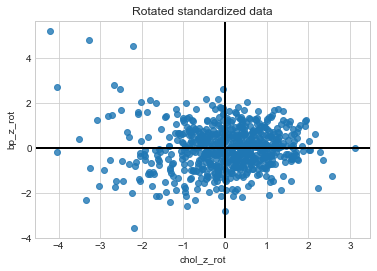

In [228]:
# Rotating the data so that the axes roughly match to vector above.
features['chol_z_rot'] = math.cos(40) * features['chol_z'] - math.sin(40) * features['bp_z']
features['bp_z_rot'] = math.sin(40) * features['chol_z'] + math.cos(40) * features['bp_z']

t = sns.regplot(
    'chol_z_rot',
    'bp_z_rot',
    features,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

In [229]:
# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them.
features = dum_feat()

featuresco = features.drop(['num','exists','adult','cholwarn','bpwarn'], axis=1)
features.head()

,num,age,exists,gender,adult,chol,cholwarn,bp,bpwarn,location
0,0,63.0,0,1.0,0,233.0,0,145.0,1,0
1,2,67.0,1,1.0,0,286.0,1,160.0,1,0
2,1,67.0,1,1.0,0,229.0,0,120.0,1,0
3,0,37.0,0,1.0,0,250.0,1,130.0,1,0
4,0,41.0,0,0.0,0,204.0,0,130.0,1,0


In [230]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(featuresco)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00151515  0.01090197  0.09584531  0.26111555  0.03537025]
 [ 0.01090197  1.00151515 -0.08628839  0.02982717  0.18789817]
 [ 0.09584531 -0.08628839  1.00151515  0.1066408  -0.02843642]
 [ 0.26111555  0.02982717  0.1066408   1.00151515  0.08451635]
 [ 0.03537025  0.18789817 -0.02843642  0.08451635  1.00151515]]


In [231]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.61586433]
 [-0.15113814]
 [-0.31290591]
 [-0.64903329]
 [-0.28056027]]
Eigenvalue 1: 1.3441789949521397
----------------------------------------
Eigenvector 2: 
[[-0.14105795]
 [ 0.66542553]
 [-0.43576348]
 [-0.06429276]
 [ 0.58590797]]
Eigenvalue 2: 1.2182740203981033
----------------------------------------
Eigenvector 3: 
[[-0.66270812]
 [ 0.06498365]
 [-0.0487638 ]
 [ 0.71963118]
 [-0.19065184]]
Eigenvalue 3: 0.7341302363478907
----------------------------------------
Eigenvector 4: 
[[ 0.38633465]
 [-0.09440654]
 [-0.80915455]
 [ 0.20916272]
 [-0.37861963]]
Eigenvalue 4: 0.9048136982926667
----------------------------------------
Eigenvector 5: 
[[-0.11125317]
 [-0.72196306]
 [-0.23471491]
 [ 0.11403571]
 [ 0.63110763]]
Eigenvalue 5: 0.8061788075849521
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.26842909 0.24328619 0.14660392 0.18068897 0.16099183]


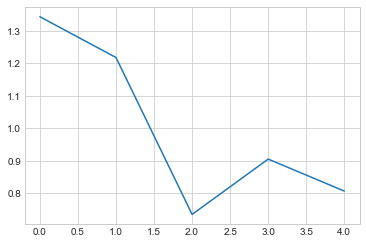

In [232]:
plt.plot(eig_val_cov)
plt.show()

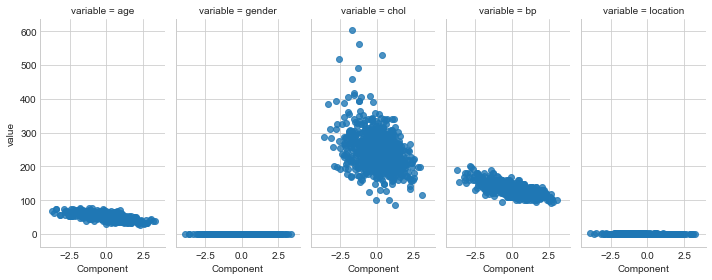

In [233]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = features[['age','gender','chol','bp','location']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

categorical variables?

In [239]:
sklearn_pca = PCA(n_components=5)
X = StandardScaler().fit_transform(featuresco)
Y_sklearn = sklearn_pca.fit_transform(X)

print(X)
print('')
print(Y_sklearn)

[[ 1.09931563  0.59074495 -0.2335795   0.68656523 -0.96576203]
 [ 1.52264662  0.59074495  0.68709902  1.53009611 -0.96576203]
 [ 1.52264662  0.59074495 -0.30306467 -0.71931958 -0.96576203]
 ...
 [ 0.14682092 -1.69277792  1.50354978 -0.32567183  1.84025424]
 [ 0.25265367  0.59074495 -0.40729243 -0.60684879  1.84025424]
 [ 0.99348289  0.59074495  0.13121765 -0.71931958  1.84025424]]

[[ 8.67874208e-01  2.70173866e-01 -1.06719576e+00 -1.02518062e+00
  -5.48351926e-04]
 [ 1.96415404e+00  7.85319072e-01 -6.62207185e-01 -1.19218187e+00
   2.81042115e-01]
 [ 1.94380296e-01  2.09220746e-01 -9.92908742e-01 -1.21628940e+00
  -1.28942342e+00]
 ...
 [ 6.09978440e-01  7.03162016e-01  1.76494761e+00  1.97714354e+00
  -8.65832569e-01]
 [ 2.39877412e-01 -1.65217674e+00  4.52285321e-01  7.33189106e-01
  -8.96740919e-01]
 [ 7.91633408e-01 -1.32024492e+00  6.25339896e-01  5.11547471e-01
  -1.49489174e+00]]


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.26842909 0.24328619 0.18068897 0.16099183 0.14660392]


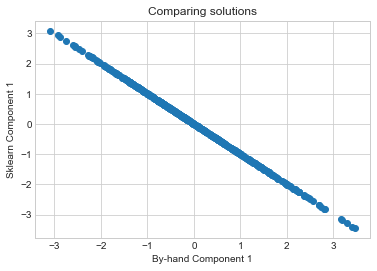

In [234]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

#  <span style="color:darkblue">Part 3: Univariate

In [65]:
heartdf['sex'] = heartdf['sex'].apply(lambda value: 'male' if value == 1 else 'female')

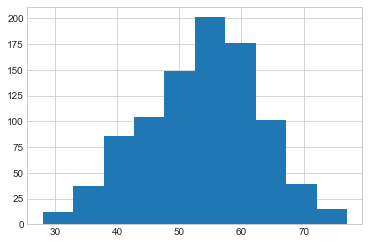

In [66]:
fig,ax = plt.subplots()

plt.hist(heartdf['age'])
plt.show()

data has a normal distribution

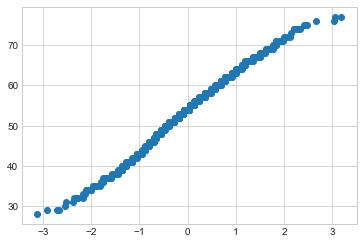

In [67]:
norm = np.random.normal(0,1,heartdf['age'].count())
norm.sort()
normcheck = np.array(heartdf['age'].astype(int).sort_values())
plt.plot(norm,normcheck,"o")
plt.show()

data has a normal distribution

In [ ]:
plt.boxplot(heartdf['age'])
plt.show()

quartile ranges are between ~27 and ~75. Median is around 55.

In [ ]:
fig,ax = plt.subplots()

for i in range(1,5):
    ax.bar(i, heartdf['sex'][(heartdf['sex'] == 'female') & (heartdf['num']==i)].count(), width=0.4, color='r')
    ax.bar(i+(.4), heartdf['sex'][(heartdf['sex'] == 'male') & (heartdf['num']==i)].count(), width=0.4, color='b')
plt.title('Bar Plot of Male/Female distribution per type of heart disease')
plt.legend(['Female','Male'])
plt.xticks([1.2,2.2,3.2,4.2], ['1','2','3','4'], rotation='horizontal')
plt.show()

Seems like the ratio of men to women per heart disease category is fairly even.

In [ ]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(x='num', y='age', hue="sex", data=heartdf,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Barplot: Heart disease by avg(age) per gender')
plt.show()

As heart disease categories increase in severity, so does the average age for men and women

In [ ]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.factorplot(x="num", y="age", hue="sex", data=heartdf,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("Heart Disease Diagnosis")
plt.title('Pointplot: Age by Heart Disease Category and Gender')
plt.show()

Similar to the above bar plot except that it shows the ranges

In [ ]:
nheartdf = heartdf.loc[(heartdf['chol'] != '?')].copy()
nheartdf['chol'] = nheartdf['chol'].astype(int)

nheartdf = nheartdf.loc[nheartdf['chol'] != 0]

In [ ]:
g = sns.lmplot(y='chol', 
               x='age',
               data=nheartdf, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("cholesterol")
g.set_xlabels("age")
plt.title('Scatterplot with regression line: Cholesterol by Age')
plt.show()

In [ ]:
# Setting the overall aesthetic.
sns.set(style="white")


g = sns.lmplot(y='chol', 
               x='age',
               hue='sex',
               data=nheartdf, # Data.
               col='num',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("cholesterol")
g.set_xlabels("age")
plt.ylim(150,350)
plt.suptitle('Scatterplot Lowess: Meal Tips by Total Bill, split by time and gender')
plt.subplots_adjust(top=0.9)
plt.show()

The cholesterol levels seem more erratic at higher heart disease categories but sample size is also decreasing.

__A. Histogram__

In [ ]:
# hist plot of diff genres gross profits
i = 1
fig=plt.figure(figsize=(12,12))

xmin = moviedata['gross'].min()
xmax = moviedata['gross'].max()
for genre in genres:
    plt.subplot(5, 5, i)
    
    i = i + 1
    plt.hist(genres[genre]['gross'],bins=10)
    plt.xlim(xmin,xmax)
    plt.xlabel('gross profits')
    plt.ylabel('frequency (by bins)')
    plt.title(genre)

fig.suptitle('Histograms of Each Genre (Gross)', fontsize=18, y=1.03)
plt.tight_layout()
plt.show()

_ __Answer to Q2:__ Based on the histogram plots, most genres appear to be left skewed._

__B. QQ Gaussian Plot__

In [ ]:
def plot_qq(series, loc=1,color='royalblue'):
    # creating random normal sampling for qq plot
    norm = np.random.normal(0, 1, series.count())

    # Sorting the values in ascending order.
    norm.sort()
    series = series.sort_values()
    
    # Plotting a genre sample against norm in qqplot.
    plt.subplot(5, 5, loc)
    plt.plot(norm, series, "o", color =color)
    
# --currently not used
def plot_qqneat(series):
    # example qq plot
    a = np.random.normal(5,5,250)
    b = np.random.rayleigh(5,250)

    percs = np.linspace(0,100,21)
    qn_a = np.percentile(a, percs)
    qn_b = np.percentile(b, percs)

    plt.plot(qn_a,qn_b, ls="", marker="o")

    x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
    plt.plot(x,x, color="k", ls="--")

In [ ]:
# qq plots of genres
i = 1
fig=plt.figure(figsize=(10,10))

for genre in genres:
    if genre == 'Animation':
        plot_qq(genres[genre]['gross'],i,'orangered')
    else:
        plot_qq(genres[genre]['gross'],i)
    i = i + 1
    plt.title(genre)

fig.suptitle('QQ Gaussian Plots Per Genre', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

_ __Answer to Q2:__ Exponential curves in QQ plots indicates most genres are left skewed. Animation appears more linear so it could have a normal distribution._

__C. Box Plot__

In [ ]:
def ser_con(genre): return genres[genre]['gross']

plt.figure(figsize=(8,8))
plt.boxplot(list(map(ser_con, un_genre)))
# Tracer()()
plt.xticks(list(range(1,19)), un_genre, rotation=90, fontsize=13)
plt.ylim(moviedata['gross'].min(), moviedata['gross'].max()*.45)
plt.tight_layout()
plt.ylabel('gross profit')
plt.title('Boxplot of Gross Profit Per Genre', fontsize=17,y=1.02)
plt.show()

_ __Answer to Q1:__ Animation films appear to have the best gross profit between the inner and upper quartile range. Romance, Horror, and Music genres seem to trend towards a positive gross profit albeit their upper quartile ranges are smaller than other high grossing genres. The lower quartile range of Action and Adventure genres seem to show a larger range of financial loss._

# <span style="color:darkblue">Part 4: Comparing Genre Samples</span>

> __Hypothesis 1: __There is a difference between gross for Action and Animation genres

__A. Descriptive Comparison__

In [ ]:
# reviewing Action for outliers
print('Action mean: {}'.format(genres['Action']['gross'].mean()))
print('Action median: {}'.format(genres['Action']['gross'].median()))
print('Action standard deviation: {}'.format(genres['Action']['gross'].std()))
print('Action median absolute deviation: {} \n'.format(genres['Action']['gross'].mad()))

# reviewing Animation for outliers
print('Animation mean: {}'.format(genres['Animation']['gross'].mean()) )
print('Animation median: {}'.format(genres['Animation']['gross'].median()))
print('Animation standard deviation: {}'.format(genres['Animation']['gross'].std()))
print('Animation median absolute deviation: {} \n'.format(genres['Animation']['gross'].mad()) )

_ __Answer to Q1:__ When compared to the action genre, the Animation genre has a comparatively large median absolute deviation and will be more inclusive of outliers_

__B. T-test (Parametric A/B Independent Samples)__

In [ ]:
#Ex T-Test with scipy for parametric, (equal_var=True because same population)
t, p = ttest_ind(genres['Animation']['gross'], genres['Action']['gross'], equal_var=True)
print('tvalue: {}, pvalue:{}'.format(t,p))

_P-value is less than 5%. Indicates variation between the Animation and Action. T-value is 4.878 (a little low)_

In [ ]:
# T-Test Raw Calculation for parametric data (assuming different population?)

# Compute the difference between the two sample means.
diff=dfGenre.loc['Animation','gross_avg'] - dfGenre.loc['Action','gross_avg']

# size of samples
size = np.array([dfGenre.loc['Animation','gross_cnt'], dfGenre.loc['Action','gross_cnt']])
# sample distribution
sd = np.array([dfGenre.loc['Animation','gross_std'], dfGenre.loc['Action','gross_std']])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5

print(diff/diff_se)

_T-value is 4.45 and is close to scipy ttest results._

__C. Mann Whitney U test (2 Non-Normally Distributed Independent Samples)__

In [ ]:
#Ex U-test with scip for nonparametric
mannwhitneyu(genres['Animation']['gross'], genres['Action']['gross'], use_continuity=True, alternative=None)

_MannWhitney U test has a p-value that is well below 1%. Indicates likelihood of variability in movie budgets between Action and Crime genres._

__D. Mood’s Median test (2+ Non-Normally Distributed Independent Samples)__

In [ ]:
stat, p, med, tbl = median_test(genres['Action']['gross'],genres['Animation']['gross'],genres['Fantasy']['gross'],genres['Science Fiction']['gross'])
print(stat,med)
print(p)

_P-value for mood's median test is less than 0.05 for a comparison of Action, Animation, Fantasy, and Science Fiction._

# <span style="color:darkblue">Part 5: Visualization of <span style="color:darkred">Budget</span> and <span style="color:darkred">Gross</span> Per Genre</span>

> __Hypothesis 2: __Budget and genre correlates with gross.

> __Hypothesis 3: __Animation films have the best gross profit potential depending on budget amount. <br>

__A. Scatter Plot__

In [ ]:
# plot of expense(x) to gross (y)
correlation = {}
i = 1
fig=plt.figure(figsize=(12,12))

xmin = moviedata['budget'].min()
xmax = moviedata['budget'].max()*.3
ymin = moviedata['gross'].min()
ymax = moviedata['gross'].max()*.3

for genre in genres:
    plt.subplot(5, 5, i)
    i = i + 1
    plt.scatter(genres[genre]['budget'],genres[genre]['gross'],.5)
    
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.title(genre)
    plt.xlabel('budget')
    plt.ylabel('gross')
    
    correlation[genre] = (genres[genre]['budget'].corr(genres[genre]['gross']))

fig.suptitle('Scatter Plots Per Genre (Gross vs Budget)', fontsize=18, y=1.03)
plt.tight_layout()
plt.show()

_ __Answer to Q3:__ The scatter plots show a better visualization of the outliers. A comparatively large number of Western films seem to have lost money. War films appear to have a wider range of profit (and or loss)._

__B. Correlation Heat Map__

In [ ]:
corr = np.array((list(correlation.values())))
labels = (np.asarray(["{}\n\n{:.2f}".format(string, value) \
        for string, value in zip(list(correlation.keys()),corr)])).reshape(3, 6)

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr.reshape(3,6), 
            annot=labels, 
            square=False, 
            ax=ax, 
            fmt="", 
            xticklabels=False, 
            yticklabels=False, 
            cmap="Blues", 
            vmin=.3, 
            vmax=.6)
plt.tight_layout()
plt.title('Correlation of Budget and Gross Profit (Per Genre)')
plt.show()

_ __Answer to Q3:__ Genres that are dark blue (Action, Fantasy, Science Fiction) have the highest correlation between budget and profit. <br>Genres that are white (Western, Horror, War, and History) have low correlation between budget and profit._

# <span style="color:darkblue">Part 6: Reflections</span>

__Further Research:__
 
> Can gross profits for a movie be predicted using features like budget and genre?<br>
<br>__Model 1:__ Use a linear regression model on budget and genre to predict gross profits. I would split genres (with sample sizes greater than 500) using train_test_split and plot a linear regression.<br>
<br>__Model 2:__ Use Naive Bayes neural network with a few features from the IDMB set (including genre) to predict gross profits and to determine which features are the most significant. I would clean up the other features in the dataset (language, production studio, and runtime) and run the NBNN to see if box office profits can be determined.


__Assumptions:__ 
><li>Movies were randomly sampled from IMDB or all movies were chosen<li>IMDB budget and revenue data are reliably sourced

__Difficulties:__ 
><li>Using the scientific method<li>Organizing presentation of the data<li>Financial data (budget/revenue/gross) was left skewed (nonparametric)<li>Interpreting T-value<li>Sample sizes for genre varied dramatically<li>Plotting 20 genres with subplots was logistically difficult<li>Scatter plots for budget and gross profits are misleading (with regards to the y-axis and diminishing returns)

------------------

__NOTES__

Samples Comparison Test Chart: https://courses.thinkful.com/data-201v1/assignment/5.5.1

------

# <span style="color:darkblue">Extra</span>

### Check Normality for Each Genre: <span style="color:darkred">Vote\_Average</span>

__A. Histogram__

In [ ]:
# hist plot of diff genres gross profits
i = 1
fig=plt.figure(figsize=(12,12))

xmin = moviedata['vote_average'].min()
xmax = moviedata['vote_average'].max()
for genre in genres:
    plt.subplot(5, 5, i)
    
    i = i + 1
    plt.hist(genres[genre]['vote_average'],bins=10)
    plt.xlim(xmin,xmax)
    plt.xlabel('Voter_Average')
    plt.ylabel('frequency (by bins)')
    plt.title(genre)

fig.suptitle('Histograms of Each Genre (Vote_Average)', fontsize=18, y=1.03)
plt.tight_layout()
plt.show()

_Most Histograms show normality. Some Western and Documentary genres appear to be skewed right._

__B. QQ Gaussian Plot__

In [ ]:
# qq plots of genres for vote_averages
i = 1
fig=plt.figure(figsize=(10,10))

for genre in genres:
    plot_qq(genres[genre]['vote_average'],i)
    i = i + 1
    plt.title(genre)

fig.suptitle('QQ Gaussian Plots Vote_Average Per Genre', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

_QQ plots of genres by vote_ \__average are linear and match the normal sample (with the exception of War and Western)_

__C. Histogram Stacking (Parametric A/B Independent Samples)__

In [ ]:
# example hist stacking of voting_average

plt.hist(genres['Action']['vote_average'],bins=10,alpha=0.5)
plt.hist(genres['Crime']['vote_average'],bins=10,alpha=0.5)

total = pd.concat([genres['Action']['vote_average'],genres['Crime']['vote_average']])
plt.hist(total,bins=10,alpha=0.1)
plt.show()

_Stacking histograms to check for overlap_

__D. T-test (Parametric A/B Independent Samples)__ https://courses.thinkful.com/data-201v1/assignment/5.5.1

In [ ]:
#Ex T-Test with scipy for parametric, (equal_var=True because same population)
t, p = ttest_ind(genres['Crime']['vote_average'], genres['Action']['vote_average'], equal_var=True)
print('tvalue: {}, pvalue:{}'.format(t,p))

In [ ]:
# T-Test Raw Calculation for parametric data

# Compute the difference between the two sample means.
diff=dfGenre.loc['Crime','vote_average_avg'] - dfGenre.loc['Action','vote_average_avg']

# size of samples
size = np.array([dfGenre.loc['Crime','vote_average_cnt'], dfGenre.loc['Action','vote_average_cnt']])
# sample distribution
sd = np.array([dfGenre.loc['Crime','vote_average_std'], dfGenre.loc['Action','vote_average_std']])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5

print(diff/diff_se)

_T-value is 6.71 and p-value is less than 5%. Indicates variation between the Crime and Action._